In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv 
csvfile = "Zsample10.csv"
zillow_df = pd.read_csv(csvfile)

In [2]:
zillow_df.head()

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,sqft,calc_sqft,fips,garage,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
0,14104290,0,1.5,2,0,1.5,0,1008,6059,2,...,97047,5,0,1965,48367,321014,2016,272647,4125.88,6.059090e+13
1,12170245,0,1.0,2,6,1.0,0,1500,6037,0,...,96265,0,1,1948,134826,674131,2016,539305,8003.98,6.037460e+13
2,17224583,0,3.5,4,0,3.5,1356,3071,6111,2,...,96385,11,0,1977,450356,900712,2016,450356,9497.78,6.111010e+13
3,10920939,0,1.0,3,4,1.0,0,1134,6037,0,...,96375,0,1,1950,116449,487319,2016,370870,5853.33,6.037100e+13
4,14455839,13,2.0,3,0,2.0,0,1410,6059,2,...,96996,6,0,1970,47884,86445,2016,38561,893.48,6.059030e+13


In [3]:
countyLA = zillow_df.loc[zillow_df["fips"] == 6037]
countyOC = zillow_df.loc[zillow_df["fips"] == 6059]
countyVC = zillow_df.loc[zillow_df["fips"] == 6111]

In [4]:
counties = zillow_df.set_index(["fips"])

In [5]:
countiesRenamed = counties.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [59]:
#countyLAData = countyLA.rename({6037: "Los Angeles"})
losAngelesData = countyLA.set_index(["fips"])
losAngelesDataRenamed = losAngelesData.rename({6037: "Los Angeles"})

In [60]:
orangeCountyData = countyOC.set_index(["fips"])
orangeCountyDataRenamed = orangeCountyData.rename({6059: "Orange County"})

In [61]:
venturaCountyData = countyVC.set_index(["fips"])
venturaCountyDataRenamed = venturaCountyData.rename({6111: "Ventura County"})

In [62]:
averageSquareFeetLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].mean()

In [63]:
averageSquareFeetOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [64]:
averageSquareFeetVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [72]:
avgLA = countiesRenamed.groupby("fips")["calc_sqft"].mean()

# Average Square Feet

In [86]:
squareFeet_df = pd.DataFrame({"Average Sq Ft Per County": avgLA})
newSquareFeet_df = squareFeet_df[(squareFeet_df.T !=0).any()]
newSquareFeet_df

,Average Sq Ft Per County
fips,
Los Angeles,1785.172927
Orange County,1851.068749
Ventura County,1829.452139


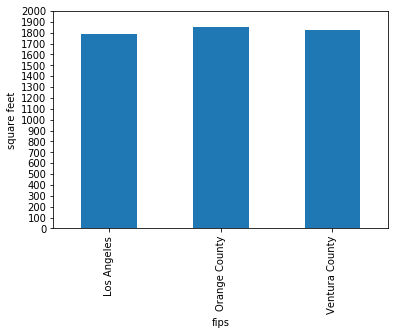

In [108]:
squareFootChart = newSquareFeet_df.plot(kind='bar', yticks=range(0,2018,100), legend=False)
squareFootChart.set_ylabel("square feet")
squareFootChart